In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import sys
from sklearn.model_selection import train_test_split    
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import random
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import shap

In [2]:
df = pd.read_csv("stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = df.drop('id',axis=1)

In [5]:
datamod =pd.get_dummies(df,columns=['work_type','smoking_status','gender'])

In [6]:
datamod['Residence_type']= datamod['Residence_type'].replace('Urban',0)
datamod['Residence_type']= datamod['Residence_type'].replace('Rural',1)
# datamod['gender'] = datamod['gender'].replace('Male',0)
# datamod['gender'] = datamod['gender'].replace('Female',1)
datamod['ever_married'] =  datamod['ever_married'].replace('Yes',1)
datamod['ever_married'] = datamod['ever_married'].replace('No',0)

In [7]:
datamod['bmi']= datamod['bmi'].fillna(0)

In [8]:
datamod = datamod[['age','gender_Male','gender_Female','gender_Other','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','stroke']]

In [9]:
datamod

,age,gender_Male,gender_Female,gender_Other,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,1,0,0,0,1,1,0,228.69,36.6,0,0,1,0,0,0,1,0,0,1
1,61.0,0,1,0,0,0,1,1,202.21,0.0,0,0,0,1,0,0,0,1,0,1
2,80.0,1,0,0,0,1,1,1,105.92,32.5,0,0,1,0,0,0,0,1,0,1
3,49.0,0,1,0,0,0,1,0,171.23,34.4,0,0,1,0,0,0,0,0,1,1
4,79.0,0,1,0,1,0,1,1,174.12,24.0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,0,1,0,1,0,1,0,83.75,0.0,0,0,1,0,0,0,0,1,0,0
5106,81.0,0,1,0,0,0,1,0,125.20,40.0,0,0,0,1,0,0,0,1,0,0
5107,35.0,0,1,0,0,0,1,1,82.99,30.6,0,0,0,1,0,0,0,1,0,0
5108,51.0,1,0,0,0,0,1,1,166.29,25.6,0,0,1,0,0,0,1,0,0,0


In [10]:

Y = datamod['stroke']
X = (pd.DataFrame(datamod.drop('stroke',axis=1)))


In [11]:
sm = SMOTE()

In [12]:
X_sm,Y_sm = sm.fit_resample(X,Y)

In [13]:
X_sm

,age,gender_Male,gender_Female,gender_Other,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000000,1,0,0,0,1,1,0,228.690000,36.600000,0,0,1,0,0,0,1,0,0
1,61.000000,0,1,0,0,0,1,1,202.210000,0.000000,0,0,0,1,0,0,0,1,0
2,80.000000,1,0,0,0,1,1,1,105.920000,32.500000,0,0,1,0,0,0,0,1,0
3,49.000000,0,1,0,0,0,1,0,171.230000,34.400000,0,0,1,0,0,0,0,0,1
4,79.000000,0,1,0,1,0,1,1,174.120000,24.000000,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,78.338790,0,0,0,0,0,1,0,112.927429,0.000000,0,0,0,0,0,0,1,0,0
9718,77.600110,0,1,0,0,0,0,0,201.487303,28.900165,0,0,0,0,0,0,0,0,0
9719,69.799367,0,1,0,0,0,0,0,76.686091,24.931676,0,0,0,1,0,0,0,0,0
9720,80.275959,1,0,0,0,0,1,0,178.303474,30.810102,0,0,1,0,0,0,1,0,0


In [14]:
scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [15]:
scale.fit(X_sm)

MinMaxScaler()

In [16]:
X_sm= scale.transform(X_sm)


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm , test_size=0.2)

In [18]:
X_train.shape

(7777, 19)

In [19]:
forest = RandomForestClassifier(n_estimators=500)

In [20]:
train_data = forest.fit(X_train,Y_train)

## forrest.fit(X_train,Y_train)

In [21]:
predictions = forest.predict(X_test)

In [22]:
metrics.accuracy_score(predictions,Y_test)

0.9727506426735218

Text(0.5, 0, 'Importance of each feature')

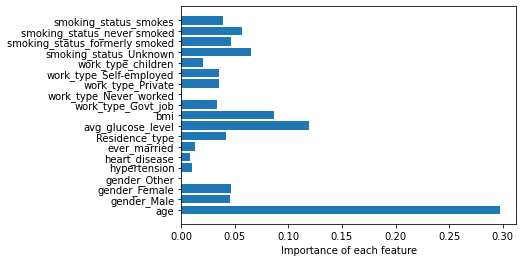

In [23]:
plt.barh(datamod.columns.drop('stroke'), forest.feature_importances_)
plt.xlabel("Importance of each feature")


In [24]:
X_test_frame= pd.DataFrame(data=X_test,columns=datamod.columns.drop('stroke'))

In [25]:
explainer = shap.TreeExplainer(forest)

In [26]:
values= explainer.shap_values(X_test)

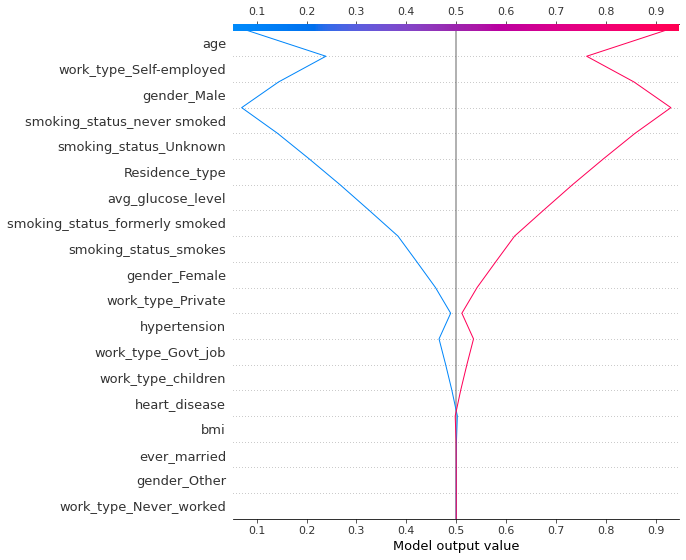

In [51]:
shap.multioutput_decision_plot(base_values=list(explainer.expected_value),shap_values=list(values),features=X_test_frame,row_index=0)

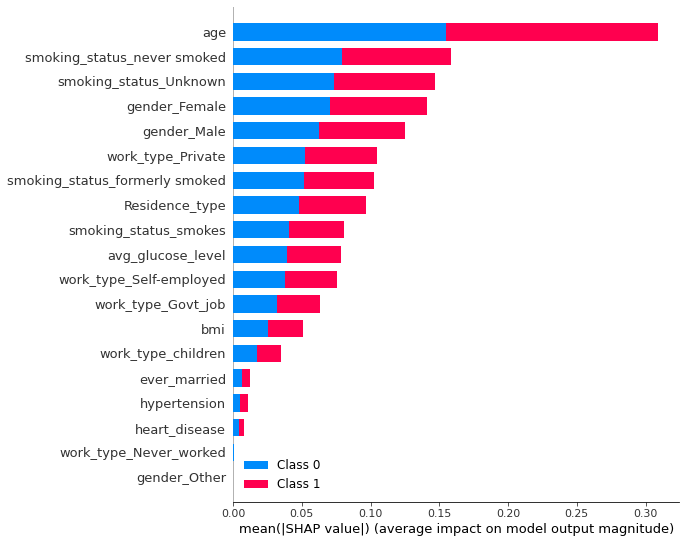

In [28]:
shap.summary_plot(values, X_test_frame)


In [56]:
data =np.array([22,,0,0,1,1,1,1,222,31,0,0,1,0,0,0,0,0,1]).reshape(-1,19)

In [57]:
ddata = scale.transform(data)

In [58]:
forest.predict(ddata)

array([0], dtype=int64)

In [52]:
datamod.columns.drop('stroke')


Index(['age', 'gender_Male', 'gender_Female', 'gender_Other', 'hypertension',
       'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level',
       'bmi', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [53]:
fdata = forest.feature_importances_

In [54]:
features = pd.DataFrame(forest.feature_importances_)

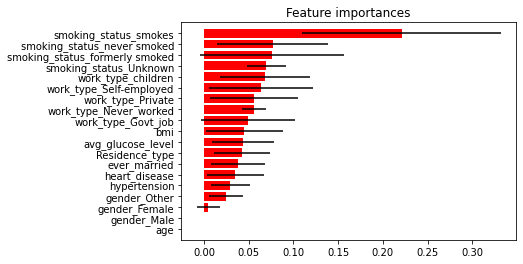

In [55]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_sm.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_sm.shape[1]), datamod.columns.drop('stroke'))
plt.ylim([-1, X.shape[1]])
plt.show()